In [1]:
from pandas import read_csv 

In [2]:
data = read_csv('~/Downloads/abalone.data')

In [3]:
data.loc[data['Sex'] != 'I', 'Adult'] = True

In [4]:
data.loc[data['Sex'] == 'I', 'Adult'] = False

In [5]:
data

,Sex,Length,Diameter,Height,WholeWeight,SchuckedWeight,VisceraWeight,ShellWeight,Rings,Adult
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,True
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,True
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,True
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,False
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,True
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,True
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,True
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,True


In [6]:
import numpy as np

In [7]:
data_x = np.array(data)[:,1:-1]
data_y = np.array(data)[:,-1]*1

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [9]:
%load_ext autoreload
%autoreload 2
# from CNN_analysis_helper import get_FASHION_MNIST_data
from MNIST_helper import plot_numbers
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras import initializers
from fnn_helper import PlotLosses

Using TensorFlow backend.


In [10]:
X_train.shape[1:]

(8,)

In [19]:
output_size = 1
default_initializer = initializers.normal(mean=0, stddev=0.01)
model_single_layer = Sequential()
model_single_layer.add(Dense(2000, kernel_initializer=default_initializer, input_shape=X_train.shape[1:]))
model_single_layer.add(Activation('relu'))
model_single_layer.add(Dense(2000, kernel_initializer=default_initializer))
model_single_layer.add(Activation('relu'))
model_single_layer.add(Dense(output_size, kernel_initializer=default_initializer, name='Salida'))
model_single_layer.add(Activation('sigmoid'))
model_single_layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2000)              18000     
_________________________________________________________________
activation_13 (Activation)   (None, 2000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2000)              4002000   
_________________________________________________________________
activation_14 (Activation)   (None, 2000)              0         
_________________________________________________________________
Salida (Dense)               (None, 1)                 2001      
_________________________________________________________________
activation_15 (Activation)   (None, 1)                 0         
Total params: 4,022,001
Trainable params: 4,022,001
Non-trainable params: 0
_________________________________________________________________


In [20]:
lr = 0.001
optim = optimizers.adam(lr=lr, decay=0.001)
model_single_layer.compile(loss = 'binary_crossentropy', optimizer=optim, metrics=['accuracy'])
model_single_layer.evaluate(X_train, y_train)

3341/3341 [==============================] - 2s 722us/step


[0.69151002149030993, 0.67824004792553405]

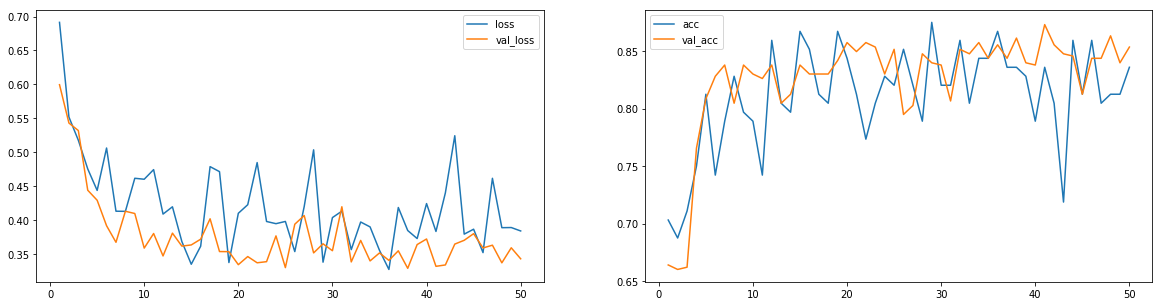

3341/3341 [==============================] - 5s 2ms/step - loss: 0.3975 - acc: 0.8270 - val_loss: 0.3425 - val_acc: 0.8517


In [21]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=20, x_val=X_test, y_val_categorical=y_test)
# checkpointer = ModelCheckpoint(filepath='single-layer.mnist.hdf5', verbose=1, save_best_only=True)
batch_size = 128
model_single_layer.fit(X_train, 
                       y_train,
                       epochs=25, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (X_test, y_test),
                       callbacks=[plot_losses],
                      )